# <h1><center> China_debt_trap_policy </center></h1>

# <h1><center> Importing Necessary Libraries </center></h1>

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# <h1><center> Importing the Dataset </center></h1>

In [157]:
df = pd.read_csv(r'C:\Users\admin\Desktop\Python\china_dept_trap.csv')
df.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


# <h1><center> Exploratory Data Analysis </center></h1>

In [158]:
df.isnull().sum()

Expand All | Collapse All      0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       1
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

- Borrower column include one null value.
- We can drop the null value as we are not sure who will be the exact borrower.

In [159]:
df = df.rename(columns={'Expand All | Collapse All': 'Projects'})

- We have renamed the 'Expand All | Collapse All' to 'Projects'

In [160]:
df.head()

,Projects,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Projects                     858 non-null    object
 1   YEAR                         858 non-null    int64 
 2   AMOUNT                       858 non-null    object
 3   LENDER                       858 non-null    object
 4   BORROWER                     857 non-null    object
 5   SECTOR                       858 non-null    object
 6   SENSITIVE TERRITORY OVERLAP  858 non-null    object
 7   Country                      858 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.8+ KB


- Only year is of integer DataType
- we need to convert the data type of Amount column

In [162]:
df.dropna(inplace = True)

- Dropping the null value

In [163]:
df.isna().sum()

Projects                       0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       0
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

In [164]:
df.index = np.arange(857)

- we will modify the index of our dataframe by assigning a array of serial numbers to it.

In [165]:
df['AMOUNT']

0       $50M
1      $7.0B
2       $47M
3      $475M
4      $600M
       ...  
852    $120M
853     $73M
854    $217M
855    $367M
856    $984M
Name: AMOUNT, Length: 857, dtype: object

In [166]:
num = []
for i in df['AMOUNT']:
    i = i.replace('$', '')
    if 'B' in i:
        i = i.replace('B', '')
        i = float(i) * 1000
    elif 'M' in i:
        i = i.replace('M', '')
        i = float(i)
    num.append(i)
num[0:10]

[50.0, 7000.0, 47.0, 475.0, 600.0, 27.0, 90.0, 180.0, 299.0, 199.0]

- Converting the datatype of Amount Column

In [167]:
df['AMOUNT']=num

- fitting the amount column into data frame

In [168]:
df.head()

,Projects,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,50.0,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,7000.0,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,47.0,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,475.0,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,600.0,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 856
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Projects                     857 non-null    object 
 1   YEAR                         857 non-null    int64  
 2   AMOUNT                       857 non-null    float64
 3   LENDER                       857 non-null    object 
 4   BORROWER                     857 non-null    object 
 5   SECTOR                       857 non-null    object 
 6   SENSITIVE TERRITORY OVERLAP  857 non-null    object 
 7   Country                      857 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 60.3+ KB


In [170]:
df.drop(['Projects'], axis=1, inplace = True)

In [171]:
df.head()

,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,2011,50.0,CDB,Government,Transport,None Known,Angola
1,2009,7000.0,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,2012,47.0,ExImBank,Government,Government,None Known,Suriname
3,2009,475.0,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,2016,600.0,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


- we have dropped the Projects column as it include almost 800 + unique value

In [172]:
pd.DataFrame(df['LENDER'].unique())

,0
0,CDB
1,ExImBank
2,"CDB, ExImBank"
3,"BOC, CDB, ExImBank"
4,"CDB, ICBC"
5,"CDB, others"
6,"CDB, Citic"


- Determing the unique lender of china

In [173]:
c = []
d = []
for i in df['LENDER']:
    c = i.split(',')
    d.append(c)

* Here, we take 2 empty lists.
* We iterate over the 'LENDER' column and those values are stored in i.
* We can split the strings in i by commas(,).
* The strings which are split are stored as multiple elements in list c.
* list c is added to list d.
* We will replace column 'LENDER' with list d.

In [174]:
df['LENDER']=d

In [175]:
df.head()

,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,2011,50.0,[CDB],Government,Transport,None Known,Angola
1,2009,7000.0,[CDB],Petrobras,"Extraction, pipelines",None Known,Brazil
2,2012,47.0,[ExImBank],Government,Government,None Known,Suriname
3,2009,475.0,[ExImBank],Electricite Du Cambodge,Power,None Known,Cambodia
4,2016,600.0,[CDB],Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


* We can use MultiLabelBinarizer, it creates new columns for unique values but unlike One Hot Encoding.
* MultiLabelBinarizer appends 1 to the respective column if that value is present and 0 if that value is absent for that particular row.
* MulitLabelBinarizer will append 1 to CDB and also 1 to ExImBank if that value in 'LENDER' is 'CDB,ExImBank' 

In [176]:
from sklearn.preprocessing import MultiLabelBinarizer
dummie = MultiLabelBinarizer()
df = df.join(pd.DataFrame(dummie.fit_transform(df.pop('LENDER')),
                index=df.index,
                columns=dummie.classes_))
df.head(5)

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,CDB,Citic,ExImBank,ICBC,others,BOC,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,0,0,0,0,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,0,0,0,0,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,0,0,0,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,0,0,0,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,0,0,0,0,0,1,0


* MultiLabelBinarizer has created nwew columns for the unique values in the lists.
* The column 'LENDER' has been dropped.
* But there is a slight problem.
* There are 2 columns for 'CDB' and 'ExImBank'.
* Let us see the column names to find out the reason.

In [177]:
df.columns

Index(['YEAR', 'AMOUNT', 'BORROWER', 'SECTOR', 'SENSITIVE TERRITORY OVERLAP',
       'Country', ' CDB', ' Citic', ' ExImBank', ' ICBC', ' others', 'BOC',
       'CDB', 'ExImBank'],
      dtype='object')

In [178]:
for i in range(len(df)):
    if df.loc[i,' CDB'] == 1:
        df.loc[i,'CDB'] = 1
    if df.loc[i,' ExImBank'] == 1:
        df.loc[i,'ExImBank'] = 1
df.head()

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,CDB,Citic,ExImBank,ICBC,others,BOC,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,0,0,0,0,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,0,0,0,0,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,0,0,0,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,0,0,0,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,0,0,0,0,0,1,0


* Some columns have a space in the string before their name.
* ' CDB', ' Citic', ' ExImBank', ' ICBC', ' others' all these have a space befre their name.
* For ' CDB' and ' ExImBank' columns we will make the values in 'CDB' and 'ExImBank' to 1.
* We will drop the duplicate name columns of ' CDB' and ' ExImBank'.

In [179]:
df.drop(columns = [' CDB', ' ExImBank'], axis = 1, inplace = True)
df.head(5)

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Citic,ICBC,others,BOC,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,0,0,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,0,0,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,0,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,0,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,0,0,0,1,0


In [180]:
for i in range(6,12):
    print(df.iloc[:,i].sum())

1
2
1
1
232
634


* As we can see the last 2 columns have the highest sum.
* The last 2 columns are for 'CDB' and 'ExImBank' and they have given out significant number of loans.
* Citic, ICBC, BOC have given out very less loans. So we can consider these columns as others.

In [181]:
for i in range(len(df)):
    if df.loc[i, 'BOC'] == 1:
        df.loc[i,' others'] = 1
    if df.loc[i, ' Citic'] == 1:
        df.loc[i,' others'] = 1
    if df.loc[i, ' ICBC'] == 1:
        df.loc[i,' others'] = 1
df.head(5)

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Citic,ICBC,others,BOC,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,0,0,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,0,0,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,0,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,0,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,0,0,0,1,0


In [182]:
df[df[' Citic'] == 1]

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Citic,ICBC,others,BOC,CDB,ExImBank
783,2010,273.0,Government,Transport,None Known,Argentina,1,0,1,0,1,0


* As we can see when there was a 1 in ' Citic' column we were able to make ' others' column to 1.
* Now we can drop ' Citic', 'ICBC' and ' BOC' columns.

In [155]:
df.drop(columns = [' Citic', ' ICBC', 'BOC'], axis = 1, inplace = True)
df.head(5)

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,others,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,1,0


* As we can see when there was a 1 in ' Citic' column we were able to make ' others' column to 1.
* Now we can drop ' Citic', 'ICBC' and ' BOC' columns.

In [71]:
df.rename(columns = {' others':'Other_Lenders'}, inplace = True)
df.head()

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Other_Lenders,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,1,0


In [73]:
df['SECTOR'].value_counts()

Transport                     316
Power                         203
Government                    138
Telecom                        63
Extraction, pipelines          38
Mulit-sector/discretionary     30
Other construction             29
Agriculture, food              27
Manufacturing                  12
fTransport                      1
Name: SECTOR, dtype: int64

In [74]:
df['SECTOR'] = df['SECTOR'].str.replace('fTransport','Transport')
df['SECTOR'] = df['SECTOR'].str.replace('Extraction, pipelines','Extraction and Pipelines')
df['SECTOR'] = df['SECTOR'].str.replace('Agriculture, food','Agricultiure and Food')
df['SECTOR'] = df['SECTOR'].str.replace('/discretionary',' and discretionary')

In [75]:
df['SECTOR'].value_counts()

Transport                         317
Power                             203
Government                        138
Telecom                            63
Extraction and Pipelines           38
Mulit-sector and discretionary     30
Other construction                 29
Agricultiure and Food              27
Manufacturing                      12
Name: SECTOR, dtype: int64

* Here fTransport has only one value. So we can add that value to Transport.
* We also can rename Extraction, pipelines to 'extraction and pipelines' and 'Agriculture, food' to 'agriculture and food'.
* 'Multi-sector/discretionary' can be renamed to 'Multisector and discretionary'.

In [76]:
df['BORROWER'].value_counts()

Government                                       677
Perusahaan Listrik Negara (PLN)                   12
Petroecuador                                       7
Petróleos de Venezuela, S.A. (PDVSA)               6
Petrobras                                          5
                                                ... 
Zambia Electricity Supply Corporation Limited      1
Pakistan National Highway Authority                1
African Export-Import Bank                         1
Azcuba                                             1
Bangladesh Chemical Industries Corporation         1
Name: BORROWER, Length: 120, dtype: int64

* Our next step is to change the 'Borrower' column.
* For that we need to check the unique values and value counts.

In [77]:
for i in range(len(df)):
    if ('Government' in df.loc[i,'BORROWER']) or ('BORROWER' in df.loc[i,'BORROWER']) or ('Govt.' in df.loc[i,'BORROWER']):
        df.loc[i,'Borrower_Gov'] = 1
    else:
        df.loc[i,'Borrower_Gov'] = 0

In [79]:
df['Borrower_Gov'].value_counts()

1.0    679
0.0    178
Name: Borrower_Gov, dtype: int64

* As we have seen 'Government has the highest value counts.
* But that is not all, in unique values there are some spelling mistakes like, Government is spelled as 'Goverment'.
* Then there are local governments like ' Madang Provincial Govt.', 'Buenos Aires local government','Government of Punjab'.
* Let us make a new column which will only tell us if the borrower is the government of the country or no.
* We will then drop the borrower column.

In [81]:
df.drop('BORROWER', inplace = True, axis = 1)
df.head()

,YEAR,AMOUNT,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Other_Lenders,CDB,ExImBank,Borrower_Gov
0,2011,50.0,Transport,None Known,Angola,0,1,0,1.0
1,2009,7000.0,Extraction and Pipelines,None Known,Brazil,0,1,0,0.0
2,2012,47.0,Government,None Known,Suriname,0,0,1,1.0
3,2009,475.0,Power,None Known,Cambodia,0,0,1,0.0
4,2016,600.0,Mulit-sector and discretionary,None Known,Kenya,0,1,0,0.0


<AxesSubplot:xlabel='AMOUNT', ylabel='Count'>

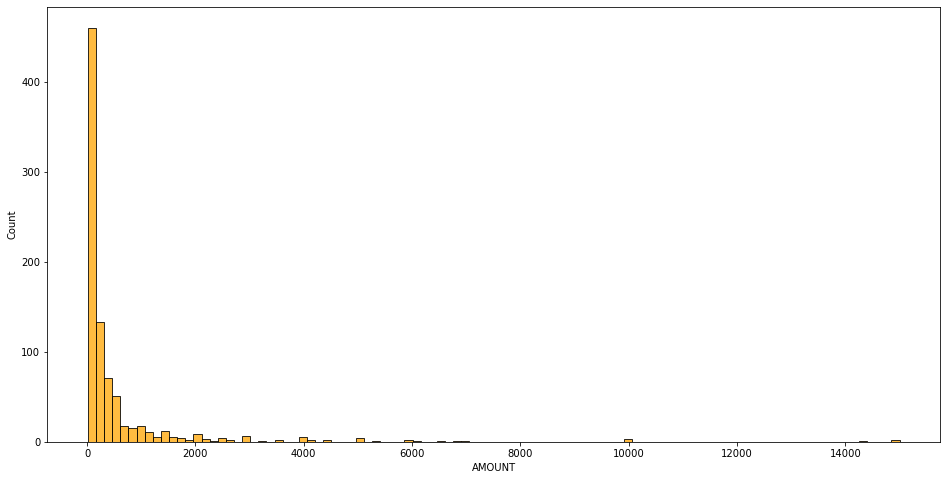

In [86]:
plt.figure(figsize = (16,8))
sns.histplot(data = df, x = 'AMOUNT', bins = 100, color = 'Orange')

* We see most of the values are in the range of 0 Millions to 2000 Millions.
* So let us zoom into that range and plot a seperate histogram for it.

<AxesSubplot:xlabel='AMOUNT', ylabel='Count'>

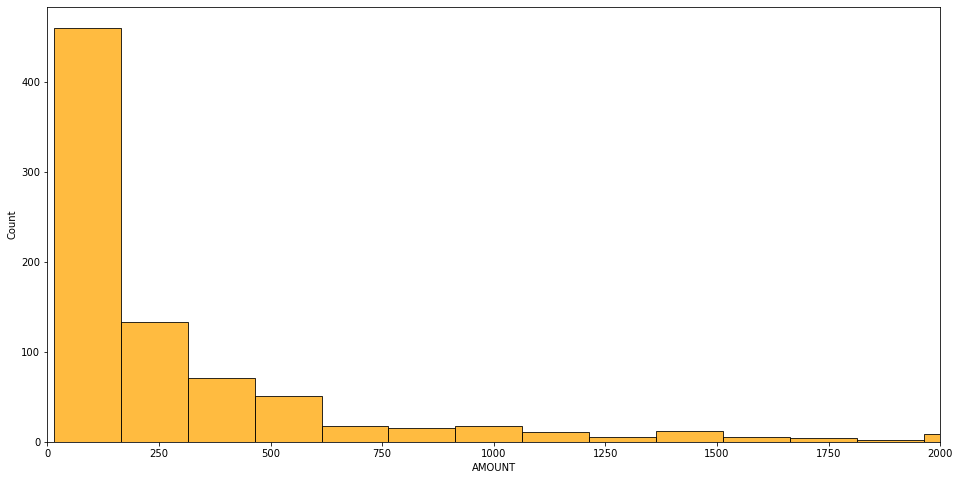

In [88]:
plt.figure(figsize = (16,8))
g = sns.histplot(data = df, x = 'AMOUNT', bins = 100, color = 'Orange')
g.set(xlim = (0,2000))
g

* From the above histogram we can say that the most number of loans were given for amounts upto 200 Millions.

<AxesSubplot:xlabel='YEAR', ylabel='count'>

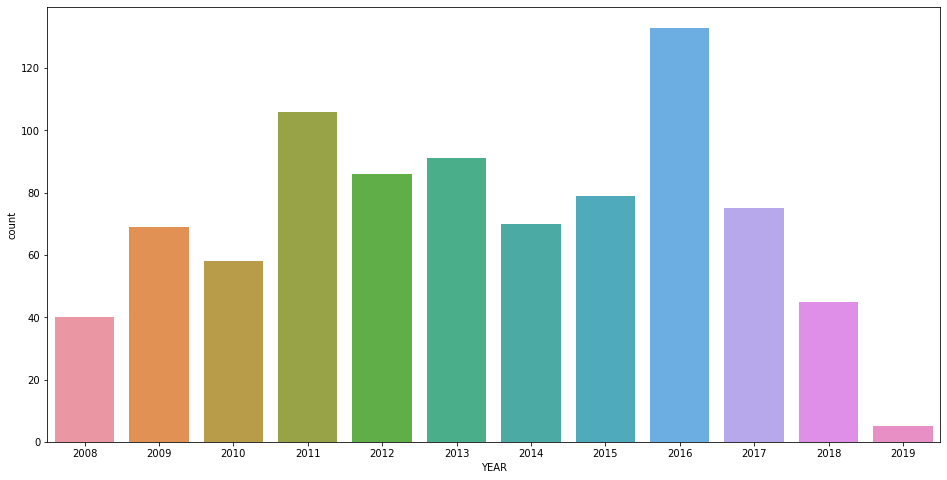

In [95]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'YEAR', data = df)

* Now let us visualize how many loans were taken in which year. For this we can use countplot from the seaborn library.
* Next, let us see how much amount of loans were taken in any year.

In [99]:
Y = df[["YEAR", "AMOUNT"]].groupby("YEAR").sum()
Y

,AMOUNT
YEAR,
2008,7565.0
2009,62400.0
2010,41235.0
2011,33949.0
2012,34886.0
2013,41852.0
2014,48391.0
2015,51104.0
2016,75001.0


<AxesSubplot:xlabel='YEAR'>

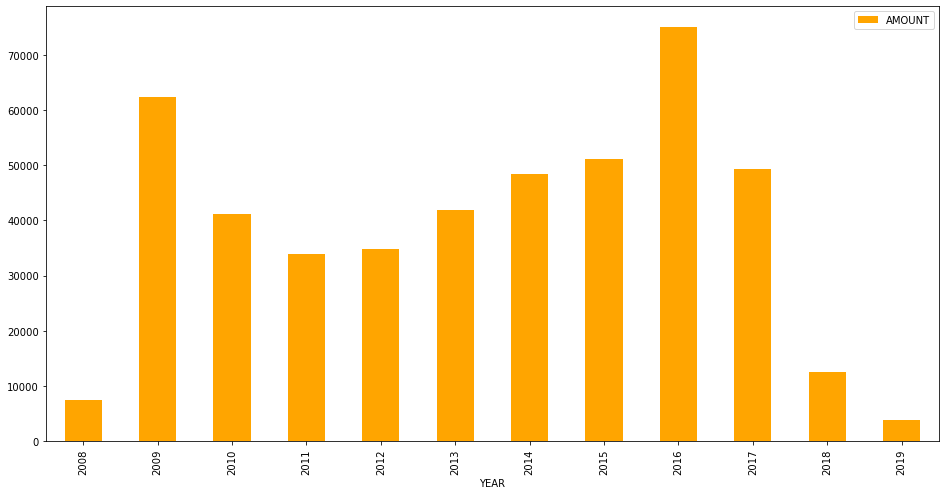

In [100]:
Y.plot(kind = 'bar', color = 'Orange',figsize = (16,8))

- The highest amount of loan were given in 2016.
- The lowest amount of loan were given in 2019.

In [102]:
loan_country = df[['Country', 'AMOUNT']].groupby('Country').agg({'AMOUNT':'sum', 'Country':'count'})
loan_country.head()

,AMOUNT,Country
Country,,
Angola,29640.0,115
Antigua & Barbuda,128.0,2
Argentina,17083.0,11
Bahamas,99.0,2
Bangladesh,11089.0,17


In [105]:
loan_country.rename(columns = {'AMOUNT': 'Amount','Country': 'Count'}, inplace = True)

In [107]:
loan_country.sort_values('Amount', ascending = False).head(5)

,Amount,Count
Country,,
Venezuela,57691.0,16
Pakistan,39853.0,23
Russian Federation,37045.0,8
Angola,29640.0,115
Brazil,28156.0,10


<AxesSubplot:ylabel='Country'>

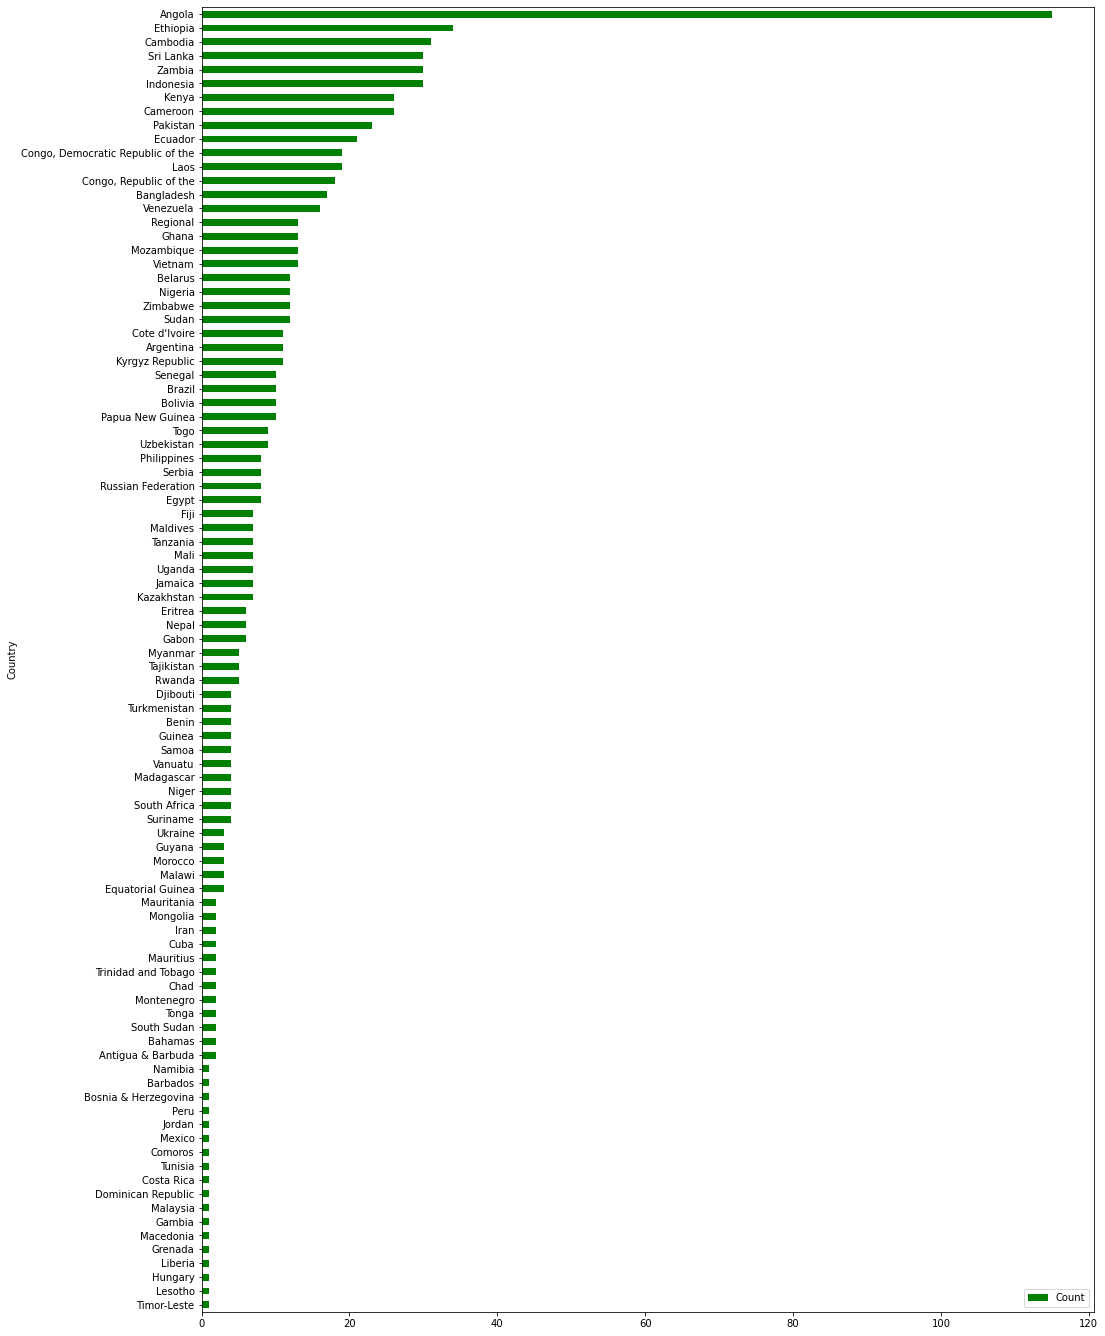

In [108]:
loan_country.sort_values('Count').plot(y = 'Count',kind = 'barh', figsize = (16,24), color = 'Green')

- From the above plot we can conclude country Angola have taken loan for most of the time

<AxesSubplot:ylabel='Country'>

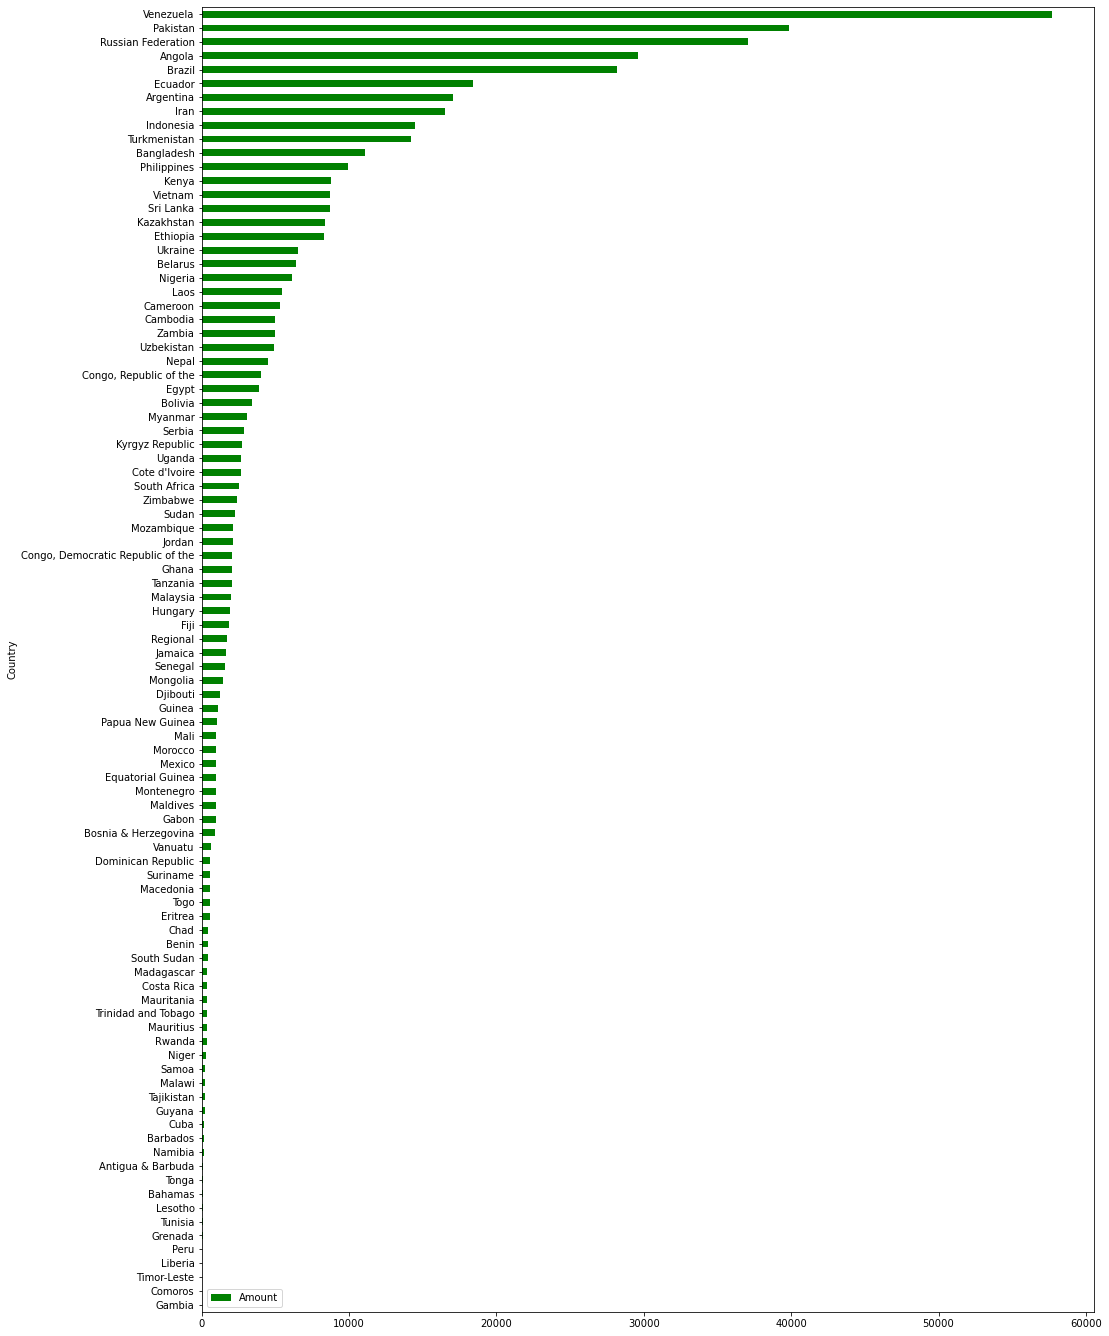

In [109]:
loan_country.sort_values('Amount', ascending = True).plot(y = 'Amount', kind = 'barh', figsize = (16,24), color = 'Green')

- And Venezuela has taken highest amount of loan.

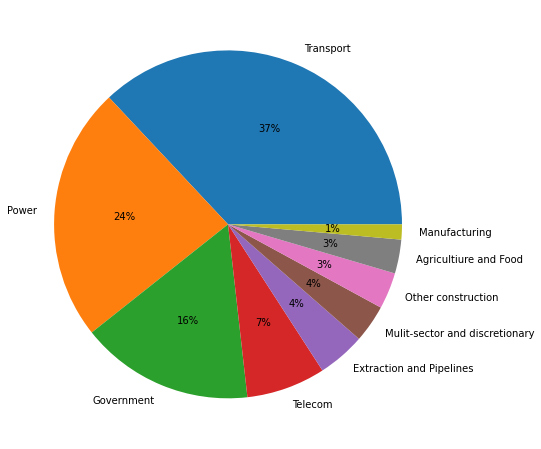

In [110]:
a = df['SECTOR'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(x = a, data = df, labels= a.index,autopct='%.0f%%')
plt.show()

- From the above diagram we can conclude most of the loan were taken for Transport sector.
- And less loan were taken for Manufacturing sector.

In [112]:
loan_per_sector = df[["SECTOR", "AMOUNT"]].groupby("SECTOR").agg({'AMOUNT':'sum', 'SECTOR':'count'})

In [113]:
loan_per_sector

,AMOUNT,SECTOR
SECTOR,,
Agricultiure and Food,7526.0,27
Extraction and Pipelines,114187.0,38
Government,23120.0,138
Manufacturing,8747.0,12
Mulit-sector and discretionary,59156.0,30
Other construction,22613.0,29
Power,98534.0,203
Telecom,8061.0,63
Transport,120203.0,317


In [114]:
loan_per_sector.rename(columns = {'AMOUNT': 'Amount','SECTOR': 'Count'}, inplace = True)

In [115]:
loan_per_sector

,Amount,Count
SECTOR,,
Agricultiure and Food,7526.0,27
Extraction and Pipelines,114187.0,38
Government,23120.0,138
Manufacturing,8747.0,12
Mulit-sector and discretionary,59156.0,30
Other construction,22613.0,29
Power,98534.0,203
Telecom,8061.0,63
Transport,120203.0,317


<AxesSubplot:ylabel='SECTOR'>

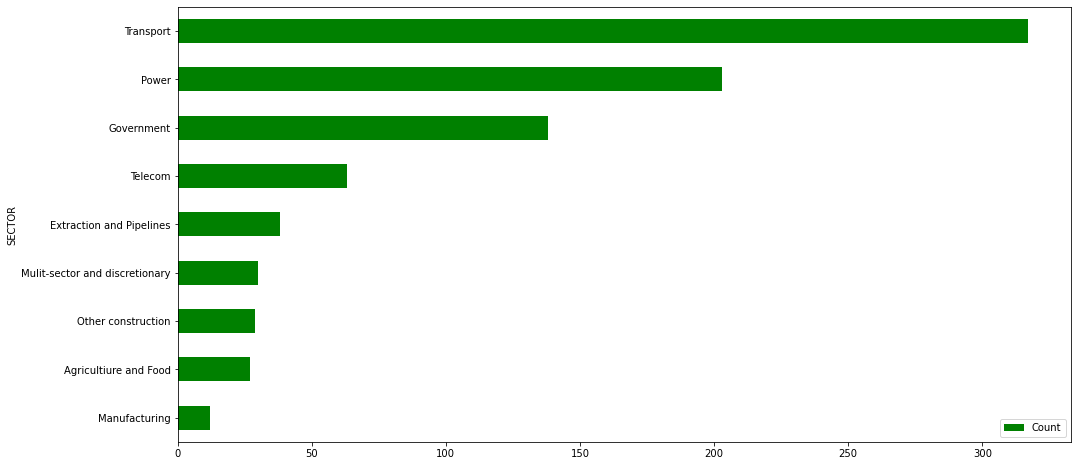

In [116]:
loan_per_sector.sort_values('Count', ascending = True).plot(y = 'Count',kind='barh', color = 'Green', figsize = (16,8))

<AxesSubplot:ylabel='SECTOR'>

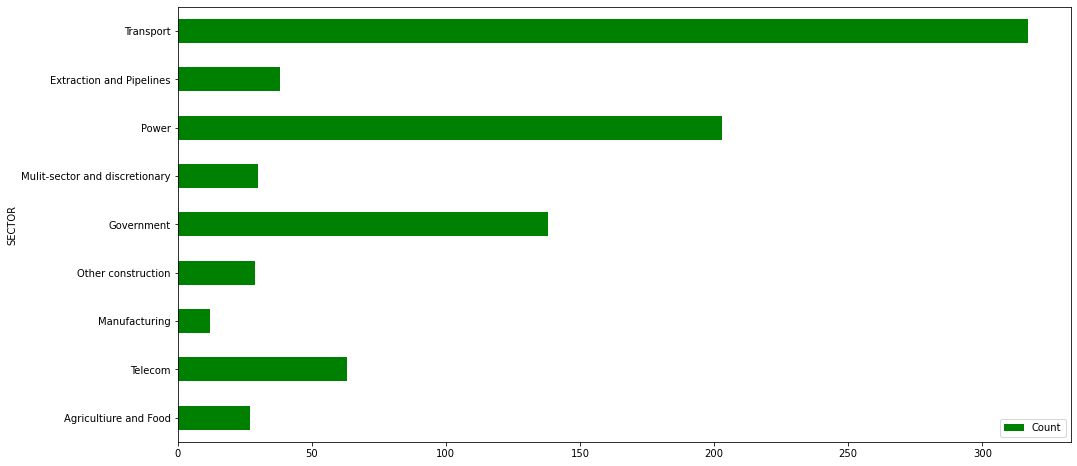

In [117]:
loan_per_sector.sort_values('Amount', ascending = True).plot(y = 'Count',kind='barh', color = 'Green', figsize = (16,8))

- From the above two diagram we can conclude highest number and highest amount of loan were given for Transport sector.

In [119]:
loan_country_sector = df[['Country','SECTOR','AMOUNT']].groupby(['Country', 'SECTOR']).sum('AMOUNT')

In [120]:
loan_country_sector[['AMOUNT']].sort_values('AMOUNT', ascending = False).head(10)

,,AMOUNT
Country,SECTOR,
Venezuela,Mulit-sector and discretionary,40500.0
Russian Federation,Extraction and Pipelines,27500.0
Brazil,Extraction and Pipelines,25000.0
Pakistan,Power,18406.0
Angola,Extraction and Pipelines,17500.0
Pakistan,Transport,16803.0
Venezuela,Extraction and Pipelines,15200.0
Iran,Other construction,15000.0
Turkmenistan,Extraction and Pipelines,14200.0


In [124]:
print(sum(df['Other_Lenders']), sum(df['CDB']),sum(df['ExImBank']))

5 232 634


In [121]:
df.head()

,YEAR,AMOUNT,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Other_Lenders,CDB,ExImBank,Borrower_Gov
0,2011,50.0,Transport,None Known,Angola,0,1,0,1.0
1,2009,7000.0,Extraction and Pipelines,None Known,Brazil,0,1,0,0.0
2,2012,47.0,Government,None Known,Suriname,0,0,1,1.0
3,2009,475.0,Power,None Known,Cambodia,0,0,1,0.0
4,2016,600.0,Mulit-sector and discretionary,None Known,Kenya,0,1,0,0.0


Text(0.5, 1.0, 'ExImBank')

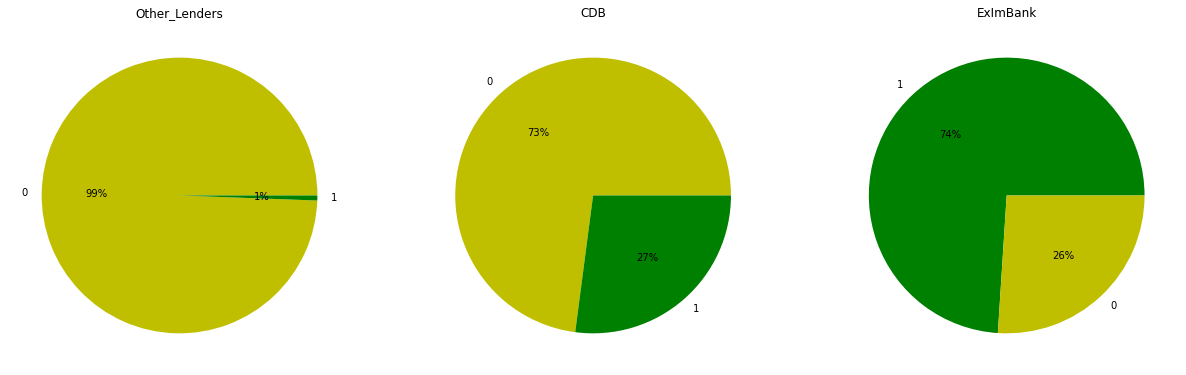

In [125]:
plt.figure(figsize = (21,12))
c = df['Other_Lenders'].value_counts()
plt.subplot(1,3,1)
plt.pie(x = c, data = df, labels = c.index, colors = ['y','Green'],autopct='%.0f%%')
plt.title('Other_Lenders')
c = df['CDB'].value_counts()
plt.subplot(1,3,2)
plt.pie(x = c, data = df, labels = c.index, colors = ['y','Green'],autopct='%.0f%%')
plt.title('CDB')
c = df['ExImBank'].value_counts()
plt.subplot(1,3,3)
plt.pie(x = c, data = df, labels = c.index, colors = ['Green','y'],autopct='%.0f%%')
plt.title('ExImBank')

- From the above diagram we can conclude higest amount loan were given by Exim Bank, followed by CDA and others bank.

# <h1><center> Thank You ! </center></h1>